In [27]:
pip install pynapple matplotlib dandi dandischema

Note: you may need to restart the kernel to use updated packages.


# Population Decoding Tutorial 

*Authors: Dhruv Mehrotra, Guillaume Viejo*


This notebook demonstrates how we use Pynapple on various publicly available datasets in systems neuroscience to streamline analysis. In this notebook, we will examine the dataset from [Peyrache et al (2015)](https://www.nature.com/articles/nn.3968), which was used to generate Figure 4a in our <a href="https://elifesciences.org/articles/85786" target="_blank">publication</a>.  

The NWB file for the example is hosted on [OSF](https://osf.io/jb2gd). We show below how to stream it.
The entire dataset can be downloaded [here](https://dandiarchive.org/dandiset/000056).

***

**Note:** This tutorial uses seaborn and matplotlib for displaying the figure as well as the dandi package
You can install all with `pip install matplotlib seaborn dandi dandischema`

***

First, import the necessary libraries:

In [28]:
import numpy as np
import pandas as pd
import pynapple as nap
import scipy.ndimage
import matplotlib.pyplot as plt
import requests, math, os
import tqdm

***

### Downloading the data

It is a small NWB file, which we can download locally onto our system. To do so, run the following lines of code:

In [29]:
path = "Mouse32-140822.nwb"
if path not in os.listdir("."):
    r = requests.get(f"https://osf.io/jb2gd/download", stream=True)
    block_size = 1024*1024
    with open(path, 'wb') as f:
        for data in tqdm.tqdm(r.iter_content(block_size), unit='MB', unit_scale=True,
            total=math.ceil(int(r.headers.get('content-length', 0))//block_size)):
            f.write(data)

***

### Parsing the data

Load the data and other relevant variables of interest


In [6]:
# Load the NWB file for this dataset
data =   

# What does this look like?
print(data)

Mouse32-140822
┍━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys                  │ Type        │
┝━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ units                 │ TsGroup     │
│ sws                   │ IntervalSet │
│ rem                   │ IntervalSet │
│ position_time_support │ IntervalSet │
│ epochs                │ IntervalSet │
│ ry                    │ Tsd         │
┕━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙


***

### Head-Direction Tuning Curves

This dataset contains units recorded from the anterior thalamus. Specifically, the anterodorsal nucleus of the thalamus (henceforth referred to as ADn), has neurons that are tuned to the direction the animal is facing in. These cells are therefore, aptly named head-direction (HD) cells. 

To study the direction-selectivity of cells in the ADn, we plot the firing rate of the neurons as a function of the animal's orientation. This plot is referred to as a HD 'tuning curve'. To plot HD tuning curves, we need the spike timings and the orientation of the animal. These quantities are stored in the variables 'units' and 'ry'.

In [7]:
# Get spike timings
spikes = 

# Get the behavioural epochs 
epochs = 

# Get the tracked orientation of the animal
angle = 

# What does this look like ?
print(spikes)

  Index    rate  location      group
-------  ------  ----------  -------
      0    2.97  thalamus          1
      1    2.43  thalamus          1
      2    5.93  thalamus          1
      3    5.04  thalamus          1
      4    0.3   adn               2
      5    0.87  adn               2
      6    0.36  adn               2
      7   10.52  adn               2
      8    2.62  adn               2
      9    2.56  adn               2
     10    7.07  adn               2
     11    0.38  adn               2
     12    1.58  adn               2
     13    4.88  adn               2
     14    8.47  adn               2
     15    0.24  adn               3
     16    0.27  adn               3
     17    6.13  adn               3
     18   11.01  adn               3
     19    5.23  adn               3
     20    6.2   adn               3
     21    2.85  adn               3
     22    9.71  adn               3
     23    1.71  adn               3
     24   19.65  adn               3
 

Here, rate is the mean firing rate of the unit. Location indicates the brain region the unit was recorded from, and group refers to the shank number on which the cell was located.

As mentioned above, this dataset contains units recorded from the anterior thalamus. Head-direction (HD) cells are found only in the ADn. In this animal, units were also recorded from nearby thalamic nuclei. For the purposes of our tutorial, we are interested in the units recorded in ADn. We can restrict ourselves to analysis of these units rather easily, using Pynapple.

In [8]:
# Select only those units that are in ADn
spikes_adn = 

# What does this look like ?
print(spikes_adn)

  Index    rate  location      group
-------  ------  ----------  -------
      4    0.3   adn               2
      5    0.87  adn               2
      6    0.36  adn               2
      7   10.52  adn               2
      8    2.62  adn               2
      9    2.56  adn               2
     10    7.07  adn               2
     11    0.38  adn               2
     12    1.58  adn               2
     13    4.88  adn               2
     14    8.47  adn               2
     15    0.24  adn               3
     16    0.27  adn               3
     17    6.13  adn               3
     18   11.01  adn               3
     19    5.23  adn               3
     20    6.2   adn               3
     21    2.85  adn               3
     22    9.71  adn               3
     23    1.71  adn               3
     24   19.65  adn               3
     25    3.88  adn               3
     26    4.02  adn               3
     27    0.69  adn               3
     28    1.78  adn               4
 

Let's compute some head-direction tuning curves. To do this in Pynapple, all you need is a single line of code!

Plot firing rate of ADn units as a function of heading direction, i.e. a head-direction tuning curve. 

In [10]:
tuning_curves = 

# What does this look like ?
print(tuning_curves)

                4         5         6          7         8         9   \
0.051502  0.255172  0.127586  0.170115   5.316080  0.000000  0.722987   
0.154505  0.300635  0.000000  0.187897   8.305042  0.037579  0.338214   
0.257508  0.189885  0.094943  0.094943  11.867814  0.158238  0.094943   
0.360511  0.498062  0.052428  0.078641  16.724387  0.052428  0.314565   
0.463514  0.362941  0.111674  0.139593  20.631824  0.055837  0.335023   
...            ...       ...       ...        ...       ...       ...   
5.819672  0.063460  0.158650  0.190380   1.491313  0.793252  0.507681   
5.922675  0.024772  0.123861  0.123861   1.337703  0.569762  0.445901   
6.025678  0.000000  0.112276  0.028069   1.936754  0.533309  0.224551   
6.128681  0.000000  0.138009  0.165611   2.152940  0.220814  0.386425   
6.231684  0.067699  0.101548  0.135397   2.504850  0.000000  0.304644   

                10        11        12         13  ...        25         26  \
0.051502  5.231023  0.467815  0.680458   9.3

Each row indicates an angular bin (in radians), and each column corresponds to a single unit. Let's compute the preferred angle quickly as follows:

In [11]:
pref_ang = tuning_curves.idxmax()

For easier visualization, we will colour our plots according to the preferred angle of the cell. To do so, we will normalize the range of angles we have, over a colourmap.

In [12]:
norm = plt.Normalize()  # Normalizes data into the range [0,1]
color = plt.cm.hsv(norm([i / (2 * np.pi) for i in pref_ang.values]))  # Assigns a colour in the HSV colourmap for each value of preferred angle
color = pd.DataFrame(index=pref_ang.index, data = color, columns = ['r', 'g', 'b', 'a'])

To make the tuning curves look nice, we will smooth them before plotting, using this custom function:

In [26]:
from scipy.ndimage import gaussian_filter1d
def smoothAngularTuningCurves(tuning_curves, sigma = 2):

    tmp = np.concatenate((tuning_curves.values, tuning_curves.values, tuning_curves.values))
    tmp = gaussian_filter1d(tmp, sigma=sigma, axis=0)

    return pd.DataFrame(index = tuning_curves.index,
        data = tmp[tuning_curves.shape[0]:tuning_curves.shape[0]*2], 
        columns = tuning_curves.columns
        )

Therefore, we have:

In [14]:
smoothcurves = smoothAngularTuningCurves(tuning_curves, sigma = 3)

What does this look like? Let's plot the tuning curves!

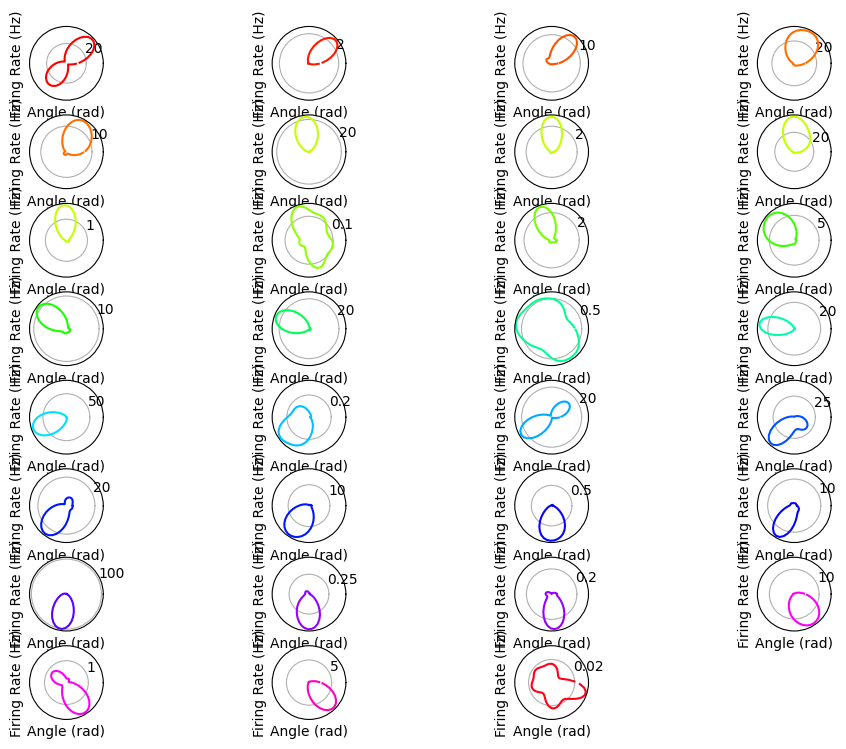

In [15]:
#Plot the tuning curves 



Awesome! 

***

### Decoding



Now that we have HD tuning curves, we can go one step further. Using only the population activity of ADn units, we can decode the direction the animal is looking in. We will then compare this to the real head direction of the animal, and discover that population activity in the ADn indeed codes for HD. 

To decode the population activity, we will be using a Bayesian Decoder as implemented in Pynapple. Just a single line of code!




In [18]:
decoded, proba_feature = 

#What does this look like?
print(decoded)

Time (s)
---------------  --------
8812.35          0.772523
8812.45          0.66952
8812.55          0.463514
8812.65          0.66952
8812.75          0.66952
...
10770.850000007  0.66952
10770.950000007  0.66952
10771.050000007  0.66952
10771.150000007  0.66952
10771.250000007  0.66952
dtype: float64, shape: (19590,)


The variable *decoded* indicates the most probable angle in which the animal was looking. 
There is another variable, *proba_feature* that denotes the probability of a given angular bin at a given time point. We can look at it below:

In [19]:
print(proba_feature.as_dataframe())

              0.051502  0.154505      0.257508      0.360511      0.463514  \
8812.35   2.199077e-06  0.000223  3.717901e-03  1.769861e-02  7.205101e-02   
8812.45   8.561129e-08  0.000013  1.858017e-03  9.312326e-03  9.216920e-02   
8812.55   4.168300e-04  0.022715  1.916560e-01  1.919596e-01  2.489159e-01   
8812.65   1.082000e-05  0.000156  5.663501e-03  1.973657e-02  1.097107e-01   
8812.75   4.128198e-05  0.001369  2.088684e-02  3.927845e-02  1.338599e-01   
...                ...       ...           ...           ...           ...   
10770.85  6.695624e-05  0.000003  1.968111e-07  1.057744e-07  5.481207e-11   
10770.95  2.924858e-04  0.000005  1.392026e-07  4.800910e-08  1.638920e-10   
10771.05  1.093979e-03  0.000115  1.300380e-05  3.998319e-06  1.464971e-08   
10771.15  5.537065e-03  0.001235  1.198087e-04  2.325507e-05  4.497914e-07   
10771.25  5.969857e-04  0.000058  2.970409e-06  2.588196e-06  3.024315e-09   

              0.566517      0.669520  0.772523      0.875526   

Each row of this pandas DataFrame is a time bin, and each column is an angular bin. The sum of all values in a row add up to 1. 

Now, let's plot the raster plot for a given period of time, and overlay the actual and decoded HD on the population activity.

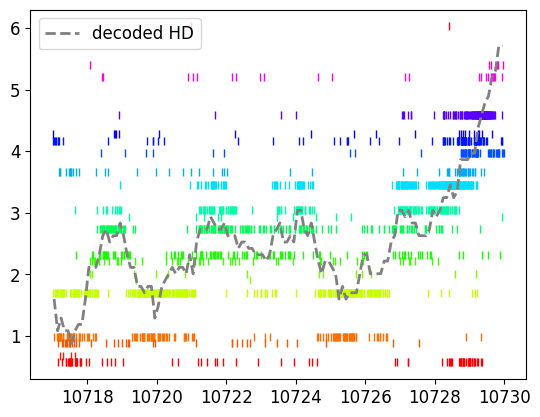

In [21]:
ep =  #Select an arbitrary interval for plotting

# Plot the raster plot for each cell



# Plot the decoded HD





From this plot, we can see that the decoder is able to estimate the head-direction based on the population activity in ADn. Amazing! 

What does the probability distribution in this example event look like? \
Ideally, the bins with the highest probability will correspond to the bins having the most spikes. Let's plot the probability matrix to visualize this.

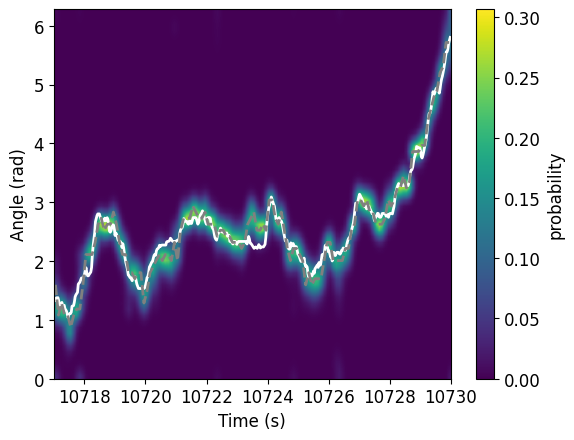

In [25]:
# Smoothening the probability distribution
smoothed = scipy.ndimage.gaussian_filter(proba_feature, 1)  

# Create a DataFrame with the smoothed distribution
p_feature = pd.DataFrame(
    index = proba_feature.index.values,
    columns = proba_feature.columns.values,
    data = smoothed,
)

# Make it a Pynapple TsdFrame
p_feature =   

#Plot the actual HD and the decoded HD, overlaying them on the smoothed probability distribution


From this probability distribution, we observe that the decoded HD very closely matches the actual HD. Therefore, the population activity in ADn is a reliable estimate of the heading direction of the animal. 

I hope this tutorial was helpful. If you have any questions, comments or suggestions, please feel free to reach out to the Pynapple Team!